In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.style.use('bmh')
%matplotlib inline

In [2]:
df_mobility = pd.read_csv('./dataframes/mobility-rep.csv.gz')
df_mobility['date'] = pd.to_datetime(df_mobility['date'])

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_mobility.head()

country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  BR         Brazil          NaN          NaN         NaN   
1                  BR         Brazil          NaN          NaN         NaN   
2                  BR         Brazil          NaN          NaN         NaN   
3                  BR         Brazil          NaN          NaN         NaN   
4                  BR         Brazil          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code       date  \
0             NaN               NaN 2020-02-15   
1             NaN               NaN 2020-02-16   
2             NaN               NaN 2020-02-17   
3             NaN               NaN 2020-02-18   
4             NaN               NaN 2020-02-19   

   retail_and_recreation_percent_change_from_baseline  \
0                                                5.0    
1                                                2.0    
2                                               -2.0    
3                                               -3.0    
4                                               -1.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0   
1                                                3.0   
2                                                0.0   
3                                               -1.0   
4                                               -2.0   

   parks_percent_change_from_baseline  \
0                                -5.0   
1                               -13.0   
2                               -12.0   
3                               -11.0   
4                                -5.0   

   transit_stations_percent_change_from_baseline  \
0                                            8.0   
1                                            3.0   
2                                            9.0   
3                                            9.0   
4                                            8.0   

   workplaces_percent_change_from_baseline  \
0                                      6.0   
1                                      0.0   
2                                     19.0   
3                                     15.0   
4                                     14.0   

   residential_percent_change_from_baseline  
0                                       0.0  
1                                       1.0  
2                                      -1.0  
3                                      -1.0  
4                                      -1.0

<AxesSubplot:title={'center':'Distribuição de Dados'}, ylabel='None'>

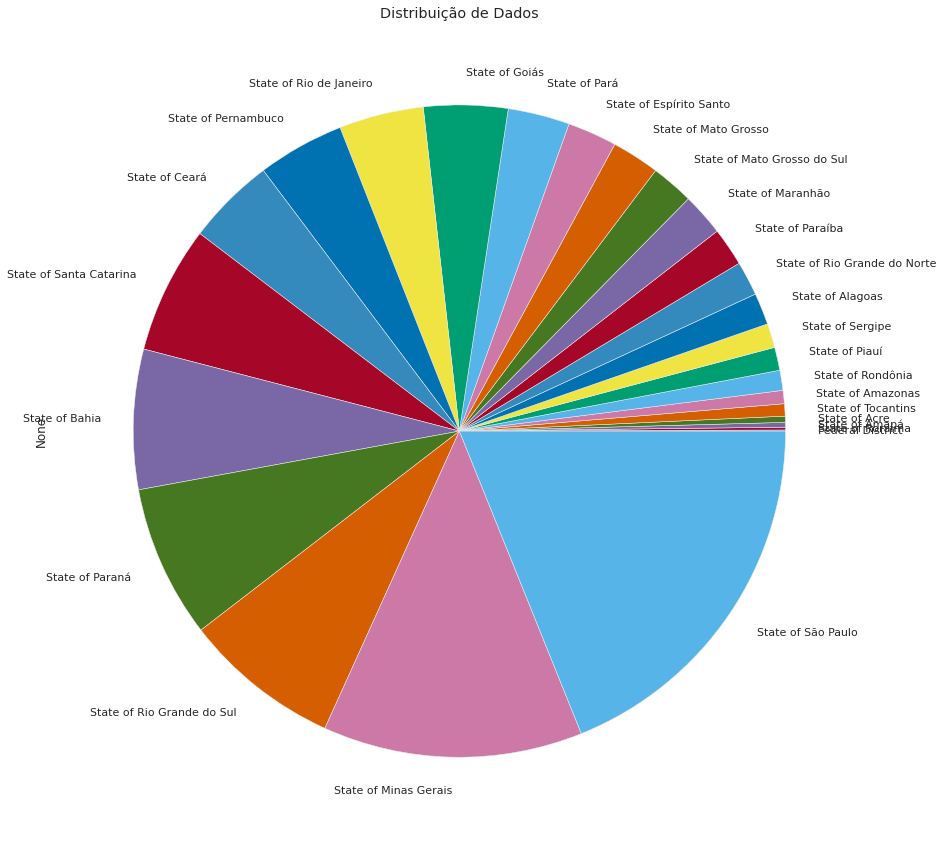

In [4]:
df_mobility.groupby('sub_region_1').size().sort_values().plot.pie(figsize=(15,15),title='Distribuição de Dados')

In [5]:
#df_mobility.groupby('sub_region_2').size().sort_values().reset_index(name='Count')
df_sub = df_mobility.groupby('sub_region_2').size().sort_values().reset_index(name='Count')
df_sub[df_sub['sub_region_1'] == 'State of Paraná']

KeyError: 'sub_region_1'

In [12]:
df_mobility[df_mobility.sub_region_1 == "State of Federal District"]

#df_sub[df_sub['sub_region_1'] == 'State of Paraná']

Empty DataFrame
Columns: [country_region_code, country_region, sub_region_1, sub_region_2, metro_area, iso_3166_2_code, census_fips_code, date, retail_and_recreation_percent_change_from_baseline, grocery_and_pharmacy_percent_change_from_baseline, parks_percent_change_from_baseline, transit_stations_percent_change_from_baseline, workplaces_percent_change_from_baseline, residential_percent_change_from_baseline]
Index: []

In [ ]:
df_mobility[df_mobility.str.sub_region_2.match('^sao')]


In [ ]:
df_mobility[['retail_and_recreation_percent_change_from_baseline',
             'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             'residential_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(18,10))

# Separar os dados por Cidade

In [ ]:
# Pegar apenas os dados de uma cidade específica
df_cidade = df_mobility[df_mobility.sub_region_2 == 'Florianópolis']

# Pegar apenas os dados de mobilidade
df_cidade = df_cidade[['retail_and_recreation_percent_change_from_baseline',
             'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             # Não compare a mudança na categoria Residencial com a de outras categorias, porque elas têm unidades de medida diferentes.
             'residential_percent_change_from_baseline',
             'date']]

# Renomear colunas
df_cidade = df_cidade.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'Retail_Recriation',
                         'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery_Pharmacy',
                         'parks_percent_change_from_baseline': 'Parks',
                         'transit_stations_percent_change_from_baseline': 'Transit',
                         'workplaces_percent_change_from_baseline': 'Workplaces',
                         'residential_percent_change_from_baseline': 'Residential'},
                         index={'date': 'date'})

# Primeira plotagem, não comparar Residential com os outros
df_cidade.groupby('date').mean().plot.line(figsize=(18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(x="date", y="Residential",
             data=df_cidade)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(x="date", y="Retail_Recriation",
             data=df_cidade)

In [ ]:
# Dados de mobilidade por semana
periodo = df_cidade.date.dt.to_period("w")
df_cidade.groupby(periodo).mean().plot()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
#sns.despine(fig, left=True, bottom=True)

sns.pairplot(df_cidade.groupby('date').mean())

In [ ]:
from statsmodels.formula.api import ols

model = ols("Residential ~ Retail_Recriation + Grocery_Pharmacy + Parks + Workplaces + Transit", data=df_cidade)
response = model.fit()
response.summary()

In [ ]:
df_cidade.tail(5)

In [ ]:
# Realizando uma predição com a regressão criada

novo = pd.DataFrame([{'Retail_Recriation': -33.0,
'Grocery_Pharmacy': 13.0,
'Parks': -30.0,
'Transit': -21.0,
'Workplaces': -23.0}])
response.predict(novo)

## Perguntas:

### 1) É possível relacionar a quantidade de casos com ao menos um desses dados do mobility?

## Hipóteses

### 1) 


